## 3.Below table contains the information of customer and their geographical and personal details , Build the classification models like Decision Tree , Random forest , KNN , kmeans and SVM to classify the data in to proper groups.

### Example Dataset

| age | workclass          | fnlwgt | education  | education-num | marital-status         | occupation        | relationship    | race  | sex   | capital-gain | capital-loss | hours-per-week | native-country | income |
|-----|-------------------|--------|------------|---------------|-------------------------|-------------------|------------------|-------|-------|--------------|--------------|----------------|-----------------|--------|
| 39  | State-gov          | 77516  | Bachelors  | 13            | Never-married           | Adm-clerical      | Not-in-family    | White | Male  | 2174         | 0            | 40             | United-States   | <=50K  |
| 50  | Self-emp-not-inc   | 83311  | Bachelors  | 13            | Married-civ-spouse      | Exec-managerial  | Husband          | White | Male  | 0            | 0            | 13             | United-States   | <=50K  |
| 38  | Private            | 215646 | HS-grad    | 9             | Divorced                | Handlers-cleaners| Not-in-family    | White | Male  | 0            | 0            | 40             | United-States   | <=50K  |
| 53  | Private            | 234721 | 11th       | 7             | Married-civ-spouse      | Handlers-cleaners| Husband          | Black | Male  | 0            | 0            | 40             | United-States   | <=50K  |
| 28  | Private            | 338409 | Bachelors  | 13            | Married-civ-spouse      | Prof-specialty   | Wife             | Black | Female| 0            | 0            | 40             | Cuba            | <=50K  |
| 37  | Private            | 284582 | Masters    | 14            | Married-civ-spouse      | Exec-managerial  | Wife             | White | Female| 0            | 0            | 40             | United-States   | <=50K  |


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import plotly.express as px
import seaborn as sns

In [257]:
# plt.style.use('fivethirtyeight')

### We have to find whether the income is below 50k or 50k or above 50k This is our Primary Goals

In [3]:
df = pd.read_excel("Data set.xlsx", sheet_name=2)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Checking for Null Values

In [4]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

### We Null in 3 variables and they are Work class, Occupation, Native Country.
### As they are Objects (Categorical) We can treat them with Mode replacement

In [5]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

### We treated the null values so we have to check again the null values

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### There may be some Values which is not clean in this data set So we have to check this

In [7]:
for i in df.columns:
    if str(df[i].dtype) == 'object':
        print(f"The Unique Values of {i.title()} Column")
        print(df[i].unique())
        print('\n')

The Unique Values of Workclass Column
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


The Unique Values of Education Column
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


The Unique Values of Marital-Status Column
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


The Unique Values of Occupation Column
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


The Unique Values of Relationship Column
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


The Unique Values of Race Column
['White' 'Black' 'Asian-Pac-Islande

### So, If we check that in Workclass, Occupation and Native-Country Columns, It has '?' in those Variables we have to treat that

In [8]:
df['workclass'][df['workclass'] == '?'].value_counts() / len(df) * 100

workclass
?    3.75906
Name: count, dtype: float64

In [42]:
df['occupation'][df['occupation'] == '?'].value_counts() / len(df) * 100

occupation
?    3.773392
Name: count, dtype: float64

In [43]:
df['native-country'][df['native-country'] == '?'].value_counts() / len(df) * 100

native-country
?    1.193645
Name: count, dtype: float64

### As we can see the value '?' is very less percantage in those columns so we are going to take them as a null value and treat them

In [9]:
df['workclass'] = df['workclass'].replace('?', pd.NA, regex=False).fillna(method='ffill')

In [47]:
df.workclass.value_counts()

workclass
Private             36267
Self-emp-not-inc     4009
Local-gov            3247
State-gov            2057
Self-emp-inc         1756
Federal-gov          1474
Without-pay            22
Never-worked           10
Name: count, dtype: int64

In [10]:
df['occupation'] = df['occupation'].replace('?', pd.NA, regex=False).fillna(method='ffill')

In [49]:
df.occupation.value_counts()

occupation
Prof-specialty       7384
Craft-repair         6377
Exec-managerial      6337
Adm-clerical         5823
Sales                5717
Other-service        5098
Machine-op-inspct    3154
Transport-moving     2461
Handlers-cleaners    2173
Farming-fishing      1534
Tech-support         1499
Protective-serv      1017
Priv-house-serv       252
Armed-Forces           16
Name: count, dtype: int64

In [11]:
df['native-country'] = df['native-country'].replace('?', pd.NA, regex=False).fillna(method='ffill')

In [51]:
df['native-country'].value_counts()

native-country
United-States                 44630
Mexico                          965
Philippines                     297
Germany                         210
Puerto-Rico                     188
Canada                          185
El-Salvador                     158
India                           152
Cuba                            140
England                         130
China                           124
South                           115
Jamaica                         108
Dominican-Republic              107
Italy                           105
Japan                            93
Vietnam                          91
Guatemala                        90
Columbia                         87
Poland                           87
Haiti                            76
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           50
Nicaragua                        49
Peru                             46
Ecuador      

### Great, We cleaned the values in every column only 'target' variable is available for treating

In [52]:
df['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

### So we have 4 values but 2 unique ones we are going to treat that

In [12]:
df['income'] = df['income'].map({'<=50K': 0, '<=50K.':0, '>50K': 1, '>50K.': 1})

In [72]:
df['income'].value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

### We have treated all the variables

In [73]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Now Encoding the Categorical Variables

### We are using the Frequency Encoding, Because the Variables in these Data sets have very high Cardinality, If we use any other encoding that may occur in high Dimensionality problem.

In [13]:
df['workclass_freq'] = df['workclass'].replace(df['workclass'].value_counts(normalize=True))
df['marital-status_freq'] = df['marital-status'].replace(df['marital-status'].value_counts(normalize=True))
df['occupation_freq'] = df['occupation'].replace(df['occupation'].value_counts(normalize=True))
df['relationship_freq'] = df['relationship'].replace(df['relationship'].value_counts(normalize=True))
df['race_freq'] = df['race'].replace(df['race'].value_counts(normalize=True))

### For native-country variable we are assigning the values beacuse it cant be ranked or the frequency wont be good

In [14]:
country = {}
n = 0
for i in df['native-country'].unique():
    country[i] = n
    n += 1
country

{'United-States': 0,
 'Cuba': 1,
 'Jamaica': 2,
 'India': 3,
 'Mexico': 4,
 'South': 5,
 'Puerto-Rico': 6,
 'Honduras': 7,
 'England': 8,
 'Canada': 9,
 'Germany': 10,
 'Iran': 11,
 'Philippines': 12,
 'Italy': 13,
 'Poland': 14,
 'Columbia': 15,
 'Cambodia': 16,
 'Thailand': 17,
 'Ecuador': 18,
 'Laos': 19,
 'Taiwan': 20,
 'Haiti': 21,
 'Portugal': 22,
 'Dominican-Republic': 23,
 'El-Salvador': 24,
 'France': 25,
 'Guatemala': 26,
 'China': 27,
 'Japan': 28,
 'Yugoslavia': 29,
 'Peru': 30,
 'Outlying-US(Guam-USVI-etc)': 31,
 'Scotland': 32,
 'Trinadad&Tobago': 33,
 'Greece': 34,
 'Nicaragua': 35,
 'Vietnam': 36,
 'Hong': 37,
 'Ireland': 38,
 'Hungary': 39,
 'Holand-Netherlands': 40}

In [15]:
df['Country Code'] = df['native-country'].map(country)

In [16]:
df['sex'] = df['sex'].map({'Male': 0, 'Female':1})

In [58]:
df['native-country'].nunique()

41

In [17]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,capital-loss,hours-per-week,native-country,income,workclass_freq,marital-status_freq,occupation_freq,relationship_freq,race_freq,Country Code
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,...,0,40,United-States,0,0.042115,0.329982,0.119221,0.257627,0.855043,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,...,0,13,United-States,0,0.082081,0.458192,0.129745,0.403669,0.855043,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,...,0,40,United-States,0,0.742537,0.135805,0.044490,0.257627,0.855043,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,...,0,40,United-States,0,0.742537,0.458192,0.044490,0.403669,0.095922,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,...,0,40,Cuba,0,0.742537,0.458192,0.151181,0.047725,0.095922,1


In [82]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'workclass_freq', 'marital-status_freq', 'occupation_freq',
       'relationship_freq', 'race_freq', 'Country Code'],
      dtype='object')

### Splitting the Dataset

In [84]:
X = df[['age', 'workclass_freq', 'fnlwgt', 'education-num', 'marital-status_freq', 'occupation_freq', 'relationship_freq', 'race_freq', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'Country Code']]
y = df['income']

In [164]:
X.shape

(48842, 14)

In [86]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(Xtrain), len(Xtest), len(ytrain), len(ytest))

39073 9769 39073 9769


## Applying the Models

### Classifier Models

### Decision Tree Classifier

In [162]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [218]:
dc = DecisionTreeClassifier(max_depth=3)

In [219]:
dc.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [239]:
ypred = dc.predict(Xtest)

In [240]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
accuracy_score(ytest, ypred)

0.8402088238304842

In [241]:
dc_auc = roc_auc_score(ytest, ypred)
dc_auc

0.7330465344442173

In [179]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[6969  445]
 [1116 1239]]


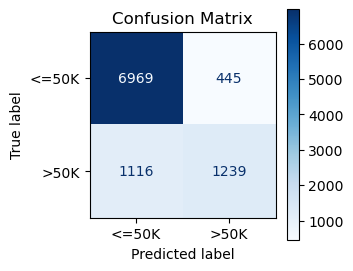

In [180]:
cm_display = ConfusionMatrixDisplay(cm, display_labels=['<=50K', '>50K'])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(cmap='Blues', values_format='.0f', ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [181]:
report = classification_report(ytest, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7414
           1       0.74      0.53      0.61      2355

    accuracy                           0.84      9769
   macro avg       0.80      0.73      0.76      9769
weighted avg       0.83      0.84      0.83      9769



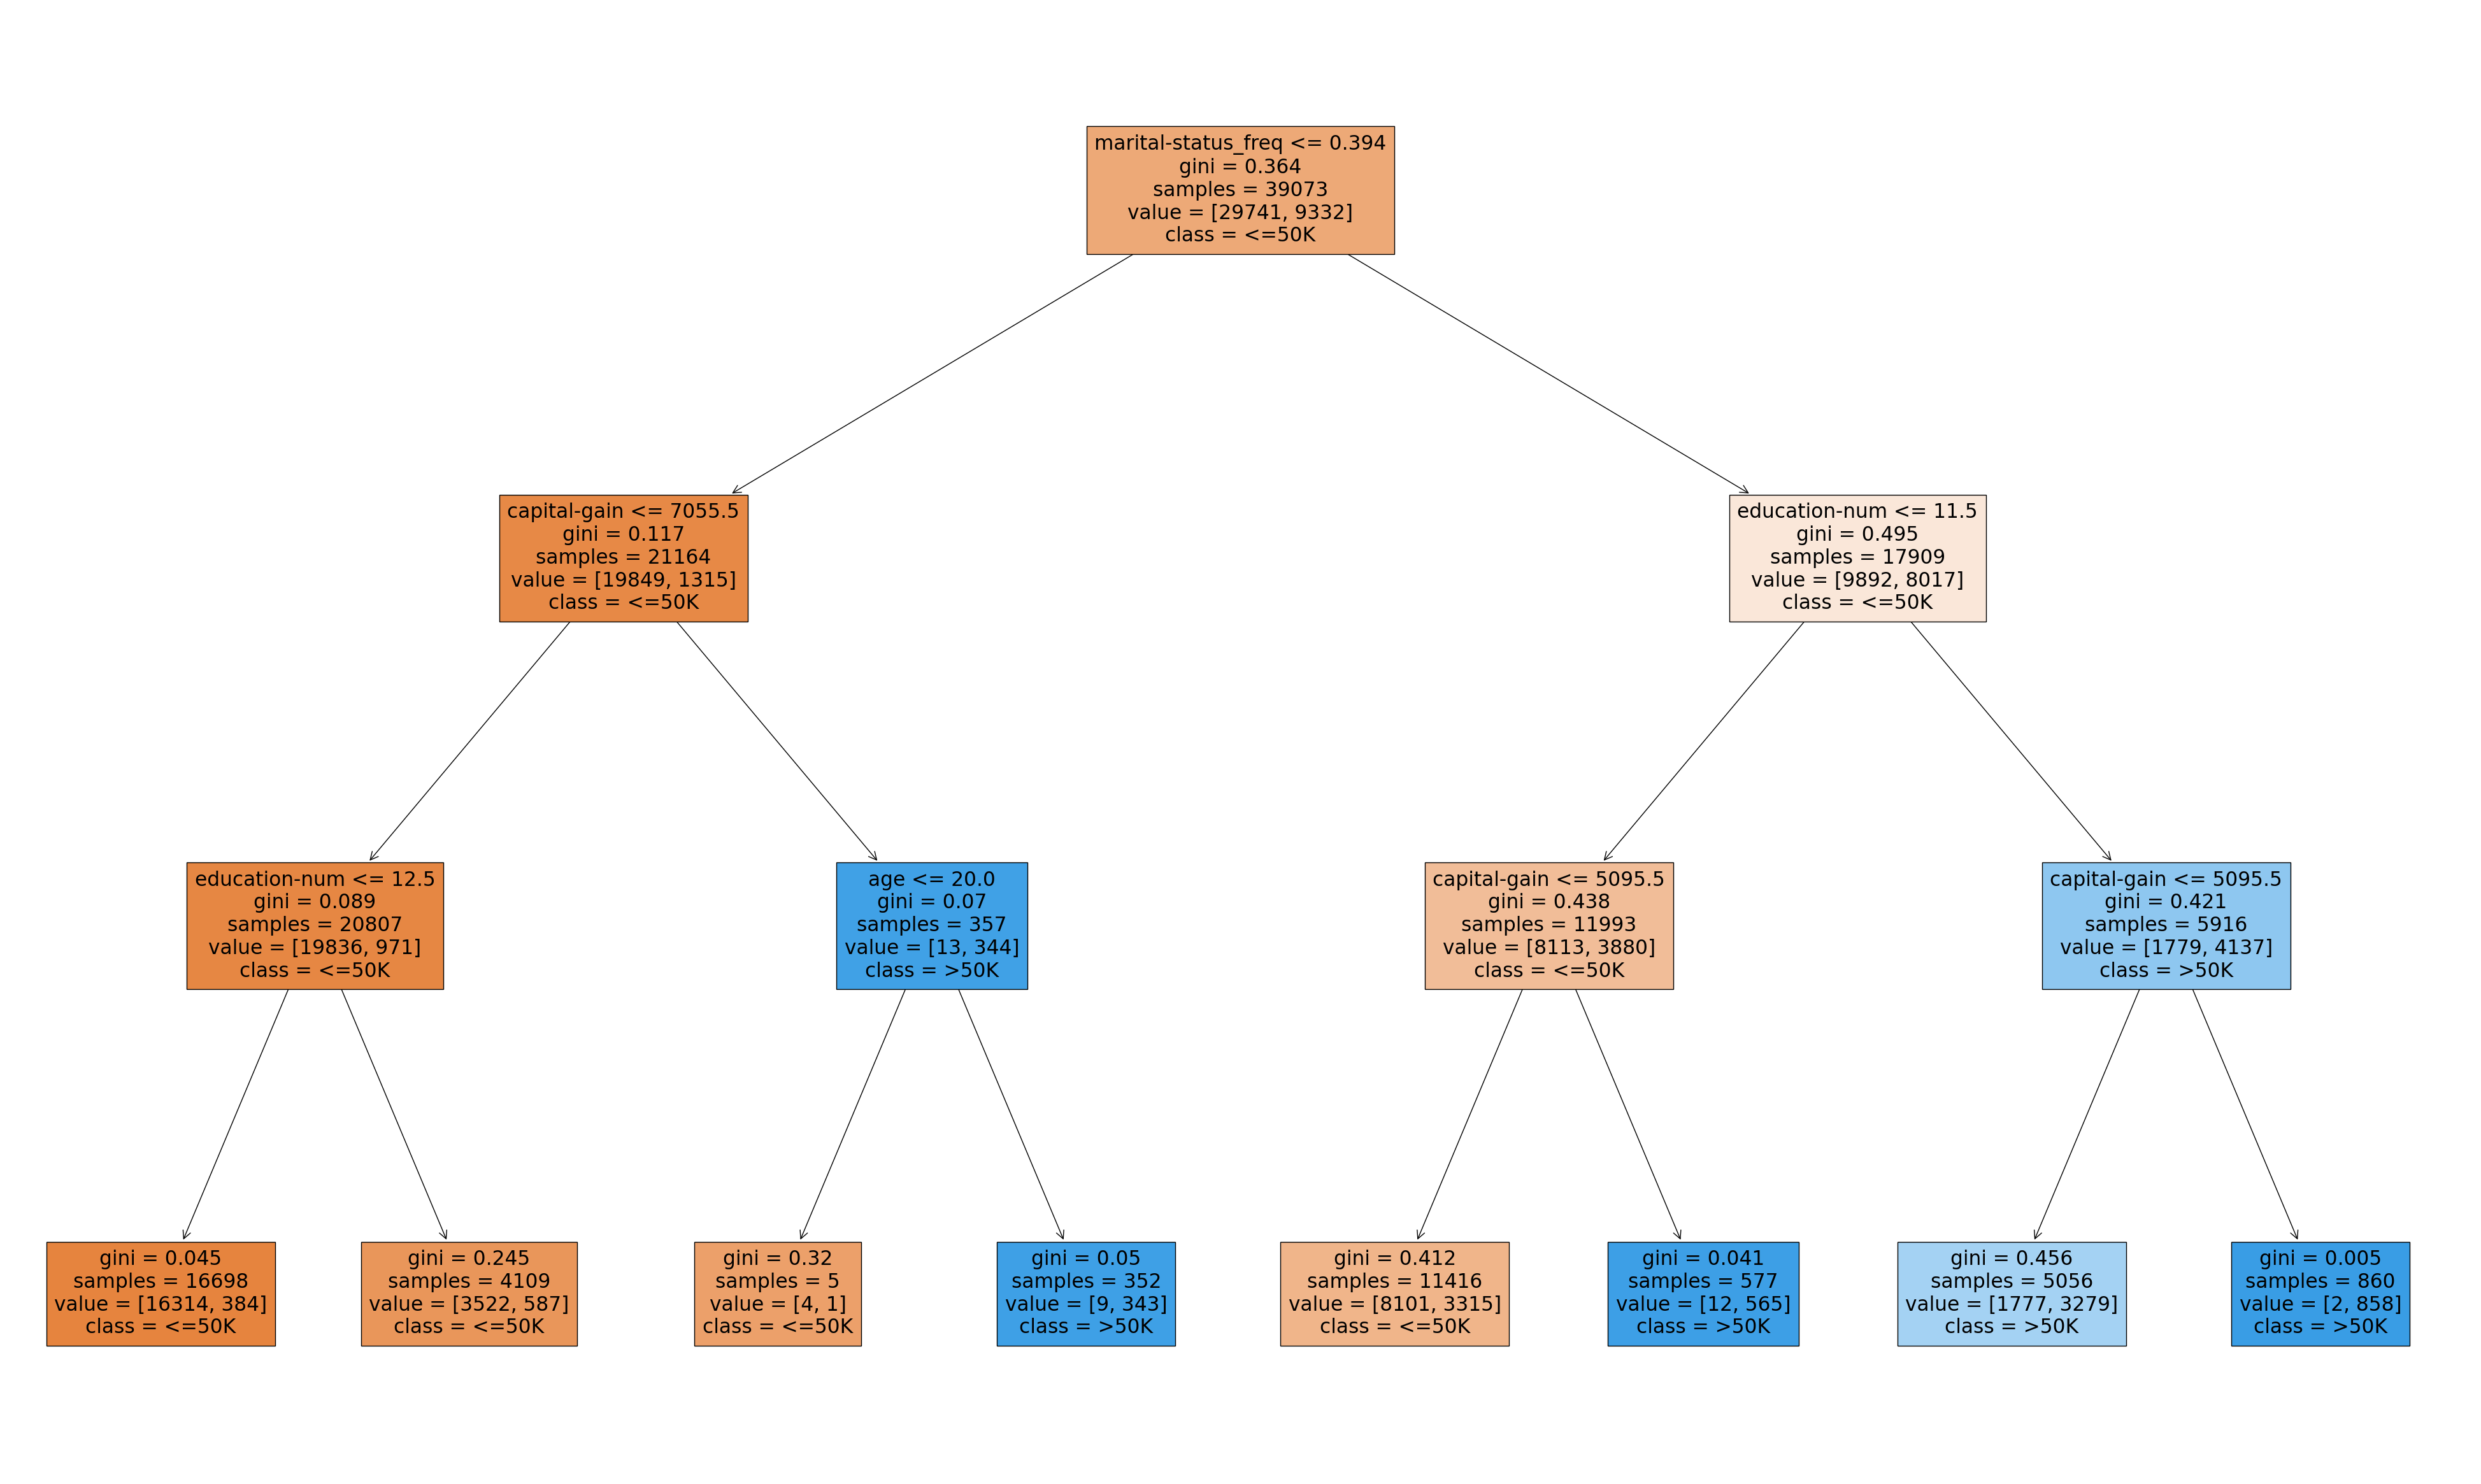

In [182]:
plt.figure(figsize=(50, 30))
_ = plot_tree(dc, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True)

### Random Forest Classifier

In [195]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators=100)

In [242]:
rc.fit(Xtrain, ytrain)

RandomForestClassifier()

In [243]:
ypred = rc.predict(Xtest)

In [244]:
accuracy_score(ytest, ypred)

0.8585320913092436

In [246]:
rc_auc = roc_auc_score(ytest, ypred)
rc_auc

0.7761213793609039

In [199]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[6924  490]
 [ 911 1444]]


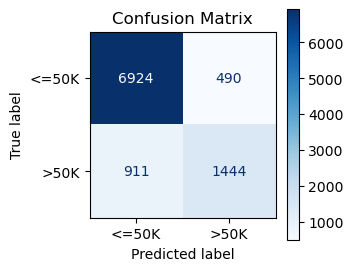

In [200]:
cm_display = ConfusionMatrixDisplay(cm, display_labels=['<=50K', '>50K'])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(cmap='Blues', values_format='.0f', ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [201]:
report = classification_report(ytest, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7414
           1       0.75      0.61      0.67      2355

    accuracy                           0.86      9769
   macro avg       0.82      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



### KNeighbor Classifier

In [247]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [248]:
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=10)

In [249]:
ypred = knn.predict(Xtest)

In [250]:
accuracy_score(ytest, ypred)

0.7949636605589109

In [251]:
knn_auc = roc_auc_score(ytest, ypred)
knn_auc

0.6032748338055564

In [206]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[7217  197]
 [1806  549]]


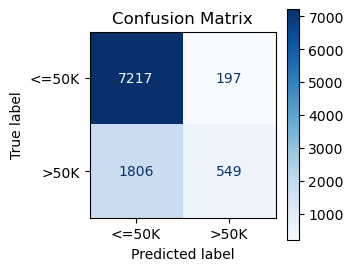

In [207]:
cm_display = ConfusionMatrixDisplay(cm, display_labels=['<=50K', '>50K'])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(cmap='Blues', values_format='.0f', ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [208]:
report = classification_report(ytest, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7414
           1       0.74      0.23      0.35      2355

    accuracy                           0.79      9769
   macro avg       0.77      0.60      0.62      9769
weighted avg       0.78      0.79      0.75      9769



### Support Vector Machine

In [229]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', probability=True)

In [230]:
svc.fit(Xtrain, ytrain)

SVC(probability=True)

In [231]:
ypred = svc.predict(Xtest)

In [232]:
accuracy_score(ytest, ypred)

0.7971133176374245

In [233]:
svc_auc = roc_auc_score(ytest, ypred)
svc_auc

0.5809316969044047

In [234]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[7402   12]
 [1970  385]]


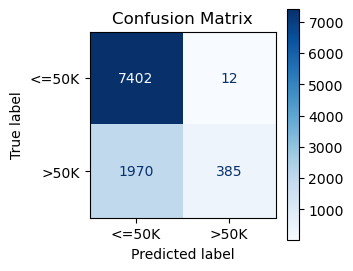

In [235]:
cm_display = ConfusionMatrixDisplay(cm, display_labels=['<=50K', '>50K'])
fig, ax = plt.subplots(figsize=(3, 3))
cm_display.plot(cmap='Blues', values_format='.0f', ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [236]:
report = classification_report(ytest, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      7414
           1       0.97      0.16      0.28      2355

    accuracy                           0.80      9769
   macro avg       0.88      0.58      0.58      9769
weighted avg       0.83      0.80      0.74      9769



### ROC Curves

In [226]:
dc_fpr, dc_tpr, dc_threshold = roc_curve(ytest, dc.predict_proba(Xtest)[:,1])
rc_fpr, rc_tpr, rc_threshold = roc_curve(ytest, rc.predict_proba(Xtest)[:,1])
knn_fpr, knn_tpr, knn_threshold = roc_curve(ytest, knn.predict_proba(Xtest)[:,1])
svc_fpr, svc_tpr, svc_threshold = roc_curve(ytest, svc.predict_proba(Xtest)[:,1])

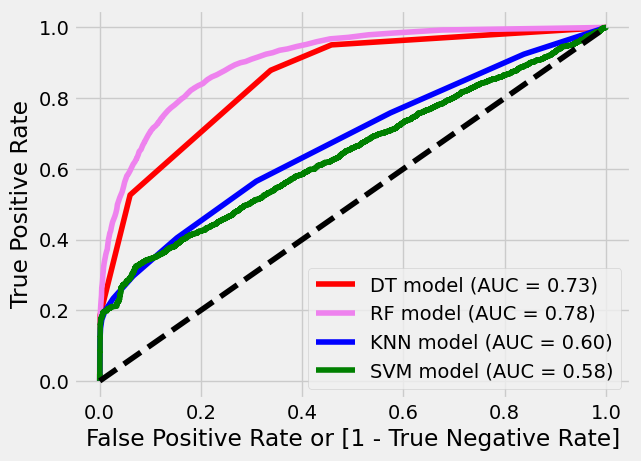

In [258]:
plt.plot(dc_fpr, dc_tpr, color='red', label=f'DT model (AUC = {dc_auc:.2f})')
plt.plot(rc_fpr, rc_tpr, color='violet', label=f'RF model (AUC = {rc_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, color='blue', label=f'KNN model (AUC = {knn_auc:.2f})')
plt.plot(svc_fpr, svc_tpr, color='green', label=f'SVM model (AUC = {svc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

### Clustering Model

### K Means Clustering

In [18]:
X = df[['age', 'workclass_freq', 'fnlwgt', 'education-num', 'marital-status_freq', 'occupation_freq', 'relationship_freq', 'race_freq', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'Country Code', 'income']]
X.head()

,age,workclass_freq,fnlwgt,education-num,marital-status_freq,occupation_freq,relationship_freq,race_freq,sex,capital-gain,capital-loss,hours-per-week,Country Code,income
0,39,0.042115,77516,13,0.329982,0.119221,0.257627,0.855043,0,2174,0,40,0,0
1,50,0.082081,83311,13,0.458192,0.129745,0.403669,0.855043,0,0,0,13,0,0
2,38,0.742537,215646,9,0.135805,0.044490,0.257627,0.855043,0,0,0,40,0,0
3,53,0.742537,234721,7,0.458192,0.044490,0.403669,0.095922,0,0,0,40,0,0
4,28,0.742537,338409,13,0.458192,0.151181,0.047725,0.095922,1,0,0,40,1,0


#### As this is the Clustring(Unsupervised Model) we don't need to split the data

In [19]:
from sklearn.cluster import KMeans
k_range = range(1, 11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

### We need to select the Number of clusters, we are using Elbow plot

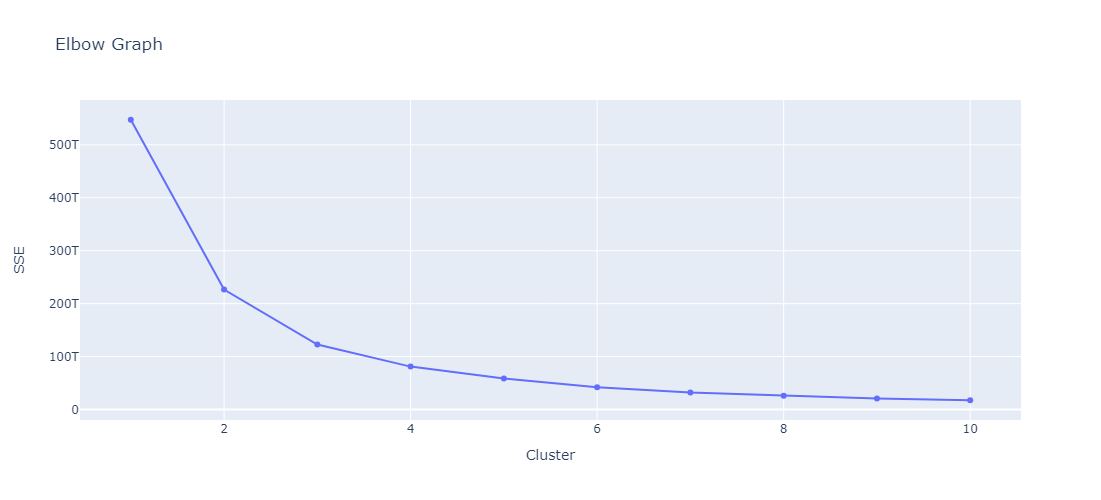

In [268]:
fig = px.line(x=k_range, y=sse, title='Elbow Graph', markers=True, labels={'x': 'Cluster', 'y': 'SSE'})
fig.update_layout(width=800, height=500)
fig.show()

### we selected Number of Clusters as 2

In [1]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(X)

In [21]:
km = KMeans(n_clusters=2)

In [22]:
pred = km.fit_predict(features_pca)

In [23]:
X['Predicted'] = pred

In [24]:
X.head()

,age,workclass_freq,fnlwgt,education-num,marital-status_freq,occupation_freq,relationship_freq,race_freq,sex,capital-gain,capital-loss,hours-per-week,Country Code,income,Predicted
0,39,0.042115,77516,13,0.329982,0.119221,0.257627,0.855043,0,2174,0,40,0,0,0
1,50,0.082081,83311,13,0.458192,0.129745,0.403669,0.855043,0,0,0,13,0,0,0
2,38,0.742537,215646,9,0.135805,0.044490,0.257627,0.855043,0,0,0,40,0,0,0
3,53,0.742537,234721,7,0.458192,0.044490,0.403669,0.095922,0,0,0,40,0,0,1
4,28,0.742537,338409,13,0.458192,0.151181,0.047725,0.095922,1,0,0,40,1,0,1


In [28]:
X['Predicted'] = X['Predicted'].astype('category')

In [25]:
from sklearn.metrics import silhouette_score
silhouette_score(X, pred)

0.5838667124538208

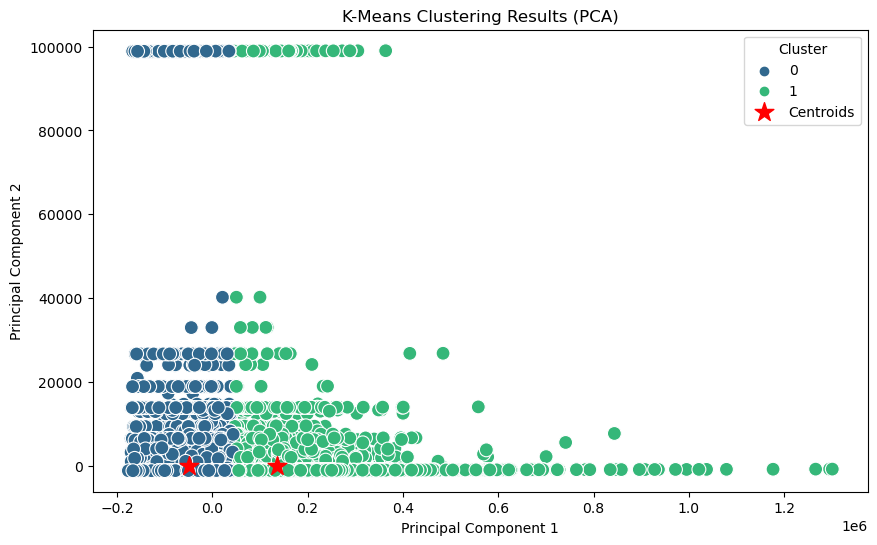

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue='Predicted', data=X, palette='viridis', s=100)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*', c='red', s=200, label='Centroids')
plt.title('K-Means Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

## Conclusion:
### We have used 5 Models for this problem 4 Classification & 1 Clustering Model.
### Out of 4 Classification Model (Decision Tree, Random Forest, KNN, SVM) almost every model performed well though Random Forest Classifier has higher accuracy score than others.
### K-Means Clustering have the decent silhouette score for segmentation.